# World Happiness Report

Dünya Mutluluk Raporu, küresel mutluluk durumuna ilişkin dönüm noktası niteliğindeki bir araştırmadır. 155 ülkeyi mutluluk seviyelerine göre sıralayan World Happiness, Birleşmiş Milletler'de yayınlandı. Ekonomi, psikoloji, anket analizi, ulusal istatistikler, sağlık, kamu politikası ve daha fazlası gibi alanlarda önde gelen uzmanlar, ulusların ilerlemesini değerlendirmek için refah ölçümlerinin nasıl etkili bir şekilde kullanılabileceğini açıklar. Raporlar, bugün dünyadaki mutluluk durumunu gözden geçiriyor ve yeni mutluluk biliminin mutluluktaki kişisel ve ulusal farklılıkları nasıl açıkladığını gösteriyor.

## İçerik

Mutluluk puanları ve sıralamaları Gallup Dünya Anketinden alınan verileri kullanır. Puanlar, ankette sorulan temel yaşam değerlendirme sorusuna verilen yanıtlara dayanmaktadır. "Cantril ladder" olarak bilinen bu soru, katılımcılardan, kendileri için en iyi 10, en kötüsü ise 0 olan bir merdiven düşünmelerini ve kendi mevcut yaşamlarını bu ölçekte derecelendirmelerini ister. Puanlar, 2015-2019 yıllarına ait ulusal temsili örneklerden alınmıştır ve tahminleri temsil etmek için Gallup ağırlıklarını kullanır. Mutluluk puanını izleyen sütunlar, altı faktörün (ekonomik üretim, sosyal destek, ortalama yaşam süresi, özgürlük, yolsuzluğun olmaması ve cömertlik) her bir ülkede yaşam değerlendirmelerini  Dystopia'da olduğundan daha yüksek yapmaya ne ölçüde katkıda bulunduğunu tahmin etmektedir. Her ülke için rapor edilen toplam puan üzerinde hiçbir etkisi yoktur, ancak bazı ülkelerin neden diğerlerinden daha yüksek sıralarda yer aldığını açıklarlar.

## Veri Hakkında

* rank : Mutluluk sıralaması
* region : Ülke ve bölge
* score : Mutluluk skoru
* gdp_per_capita : Kişi başına gayri safi yurtiçi hasıla
* healthy_life_expectancy : Sağlıklı yaşam beklentisi
* freedom_to_life_choise : Hayatta seçim yapma özgürlüğü
* generosity : Cömertlik
* corruption_perceptions : Hükümet yolsuzluk algısı

## Amaç
Bu bir EDA projesidir. Bununla birlikte, veriler bir eğitim setine bölünür ve bir test seti ile analizi bir makine öğrenimi probleminde kullanmak için hangi değişikliklerin yapılabileceği konusunda öneriler sağlanır.

## İş Akışı

* Cleaning: daha fazla analizin anlamlı ve ilgili bilgilere dayanmasını sağlamak için verilerdeki bozuk veya yanlış kayıtların algılanması ve düzeltilmesi (veya kaldırılması).
* EDA, verilerinizi tanımak, verilerle belirli bir aşinalık kazanmak ve ondan ilk içgörüleri çıkarmakla ilgilidir.
* Data Visualization , verilerle ilgi çekici bir hikaye anlatabilme yeteneğidir ve farklı amaçlara sahip olabilir (bildirimsel veya keşif amaçlı)
* Features Engineering , verileri makine öğrenimi modellerinin verimliliğini en üst düzeye çıkaran daha iyi bir temsile dönüştürme sürecidir.
* Machine Learning: Makine öğrenimi algoritmalarındaki uzmanlık ve bunların değerlendirilmesi.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## 1. Import the Dataset

In [2]:
r_2015 = pd.read_csv("2015.csv")
r_2016 = pd.read_csv("2016.csv")
r_2017 = pd.read_csv("2017.csv")
r_2018 = pd.read_csv("2018.csv")
r_2019 = pd.read_csv("2019.csv")

dataset=[r_2015, r_2016, r_2017, r_2018, r_2019]

for i in dataset:
    print("data columns\n", i.columns, "\n")

data columns
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

data columns
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

data columns
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

data columns
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
 

In [3]:
r_2015.drop(["Region",'Standard Error', 'Family', 'Dystopia Residual'],axis=1,inplace=True)
r_2015.columns = ["region", "rank", "score", "gdp_per_capita",
"healthy_life_expectancy", "freedom_to_life_choise", "corruption_perceptions",
"generosity"]

r_2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            "Family",'Dystopia Residual'],axis=1,inplace=True)
r_2016.columns = ["region","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_to_life_choise","corruption_perceptions","generosity"]

r_2017.drop(["Whisker.high","Whisker.low",
            "Family","Dystopia.Residual"],axis=1,inplace=True)
r_2017.columns =  ["region","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_to_life_choise","generosity","corruption_perceptions"]

r_2018.columns = ["rank","region","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_to_life_choise","generosity","corruption_perceptions"]
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

coltoselect = ["rank","region","score",
                "gdp_per_capita","healthy_life_expectancy",
                "freedom_to_life_choise","generosity","corruption_perceptions"]
r_2019.columns = ["rank","region","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_to_life_choise","generosity","corruption_perceptions"]

dataset=[r_2015, r_2016, r_2017, r_2018, r_2019]

for i in dataset:
    print("data columns\n", i.columns, "\n")

data columns
 Index(['region', 'rank', 'score', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_life_choise', 'corruption_perceptions', 'generosity'], dtype='object') 

data columns
 Index(['region', 'rank', 'score', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_life_choise', 'corruption_perceptions', 'generosity'], dtype='object') 

data columns
 Index(['region', 'rank', 'score', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_life_choise', 'generosity', 'corruption_perceptions'], dtype='object') 

data columns
 Index(['rank', 'region', 'score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_life_choise', 'generosity', 'corruption_perceptions'], dtype='object') 

data columns
 Index(['rank', 'region', 'score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_life_choise', 'generosity', 'corruption_perceptions'], dtype='object') 



* 5 ayrı csv dosyasındaki değişkenler, tek tip değişken haline getirildi.

In [4]:
r_2015 = r_2015.loc[:,coltoselect].copy()
r_2016 = r_2016.loc[:,coltoselect].copy()
r_2017 = r_2017.loc[:,coltoselect].copy()
r_2018 = r_2018.loc[:,coltoselect].copy()
r_2019 = r_2019.loc[:,coltoselect].copy()

In [5]:
r_2015["year"] = 2015
r_2016["year"] = 2016
r_2017["year"] = 2017
r_2018["year"] = 2018
r_2019["year"] = 2019

* Her DataFrame'e yıl sütunu eklendi

In [6]:
world_happiness_report_df = r_2015.append([r_2016,r_2017,r_2018,r_2019])
df = world_happiness_report_df.copy()
df.head()

rank       region  score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions  year
0     1  Switzerland  7.587         1.39651                  0.94143                 0.66557     0.29678                 0.41978  2015
1     2      Iceland  7.561         1.30232                  0.94784                 0.62877     0.43630                 0.14145  2015
2     3      Denmark  7.527         1.32548                  0.87464                 0.64938     0.34139                 0.48357  2015
3     4       Norway  7.522         1.45900                  0.88521                 0.66973     0.34699                 0.36503  2015
4     5       Canada  7.427         1.32629                  0.90563                 0.63297     0.45811                 0.32957  2015

* Veriler tek bir DataFrame içerisinde toplandı.

In [7]:
df.shape

(782, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     782 non-null    int64  
 1   region                   782 non-null    object 
 2   score                    782 non-null    float64
 3   gdp_per_capita           782 non-null    float64
 4   healthy_life_expectancy  782 non-null    float64
 5   freedom_to_life_choise   782 non-null    float64
 6   generosity               782 non-null    float64
 7   corruption_perceptions   781 non-null    float64
 8   year                     782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 61.1+ KB


## 1.1 Eksik Veri Analizi (Missing Data Detection)

In [9]:
if df.isnull().sum().sum() >= 1:
    print("missing data!")

missing data!


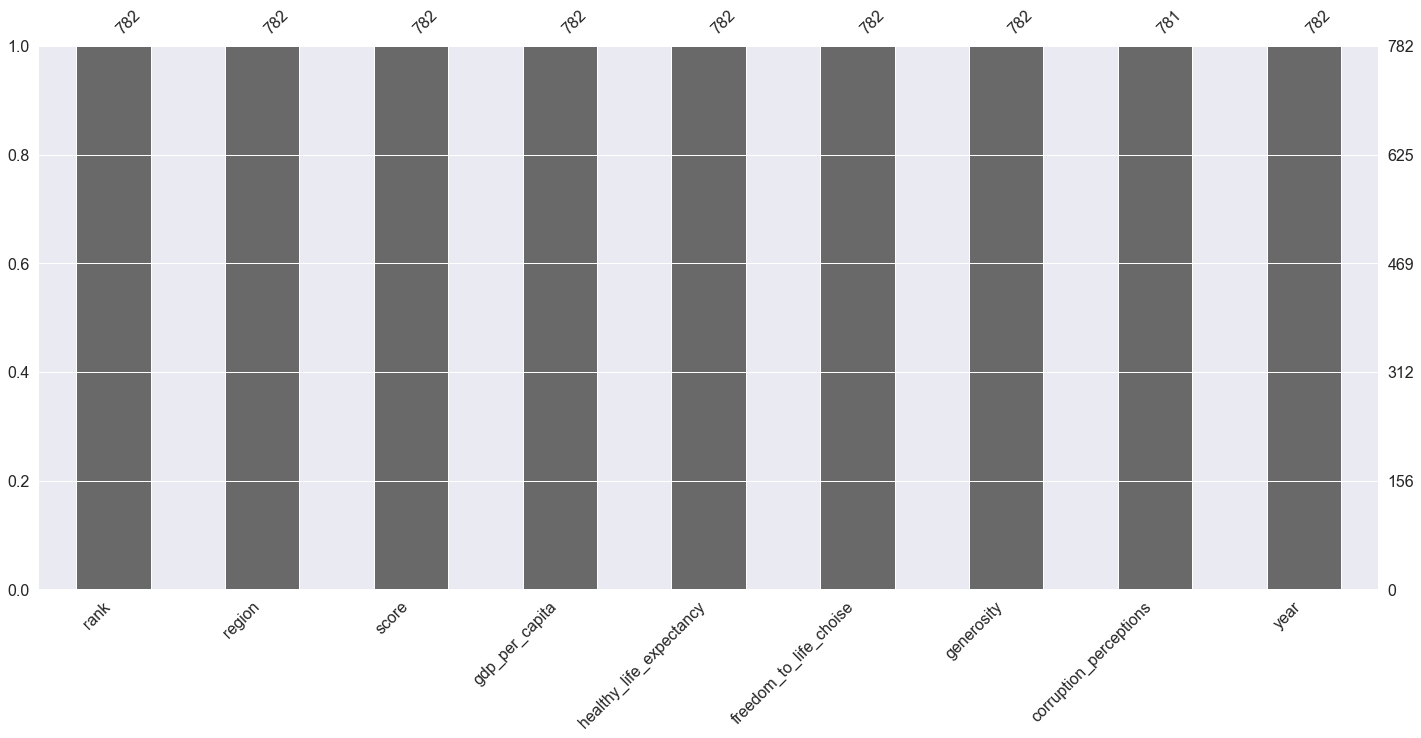

In [10]:
import missingno as msno
msno.bar(df)
plt.show()

In [11]:
df.loc[df.isnull().any(axis=1),:]

rank                region  score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions  year
19    20  United Arab Emirates  6.774           2.096                     0.67                   0.284       0.186                     NaN  2018

* Eksik gözlem analizinde veriyi satır bazında silmek önerilen bir yöntem değil. Ancak yolsuzluk algısının "score" üzerinde etkisini tam olarak kestiremediği için öncelikle korelasyon değerlerine bakılacaktır.

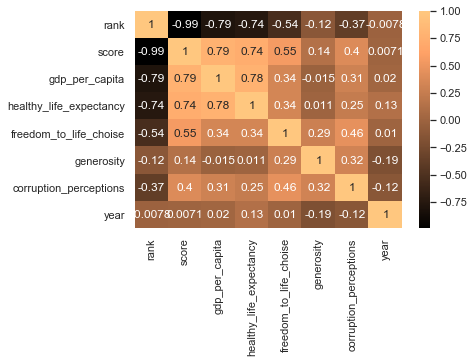

In [12]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'copper', annot = True)

plt.show()

In [13]:
df.dropna(inplace=True)

* "corruption_perceptions" ile "score" arasındaki korelasyon katsayısı %40 ve azınmsanmayacak bir orandır. "United Arab Emirates" bölgesi için yanlış sonuşlar doğurmaması adına satır bazında silinme işlemi yapılmıştır.

## 1.2 Aykırı Gözlem Analizi (Outliers Detection)

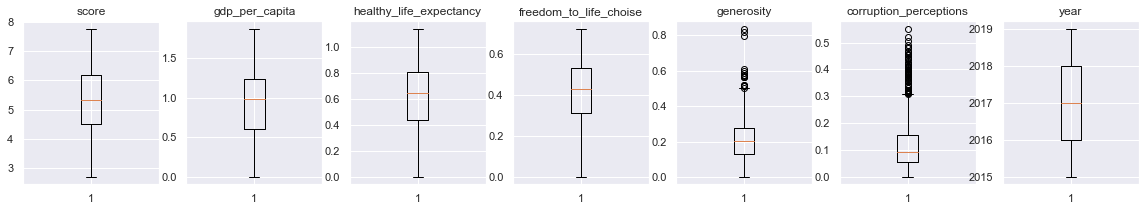

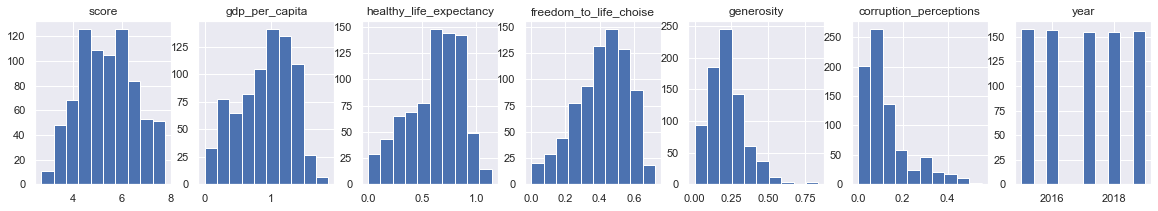

In [14]:
from matplotlib import pyplot

pyplot.figure(figsize=(20,3))

i=171
for col in['score', 'gdp_per_capita', 'healthy_life_expectancy', 
           'freedom_to_life_choise', 'generosity', 'corruption_perceptions', 'year']:
    pyplot.subplot(i)
    pyplot.boxplot(df[col])
    pyplot.title(col)
    i+=1
pyplot.show()


pyplot.figure(figsize=(20,3))
j = 171
for col in['score', 'gdp_per_capita', 'healthy_life_expectancy', 
           'freedom_to_life_choise', 'generosity', 'corruption_perceptions', 'year']:
    pyplot.subplot(j)
    pyplot.hist(df[col])
    pyplot.title(col)
    j+=1
pyplot.show()

In [15]:
def outliers_det(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_range = Q1 - (1.5*IQR)
    upp_range = Q3 + (1.5*IQR)
    
    return low_range, upp_range

low_corrupt, upp_corrupt = outliers_det(df['corruption_perceptions'])
low_gen, upp_gen = outliers_det(df['generosity'])


print("corruption_perception aykırı gözlem sayısı: "+str((df['corruption_perceptions']>upp_corrupt).sum()))

print("generosity aykırı gözlem sayısı: "+str((df['generosity']>upp_gen).sum()))

df['corruption_perceptions'] = df.apply(
    lambda row: upp_corrupt if row['corruption_perceptions']>upp_corrupt else row['corruption_perceptions'],
    axis=1)

df['generosity'] = df.apply(
    lambda row: upp_gen if row['generosity']>upp_gen else row['generosity'],
    axis=1)

corruption_perception aykırı gözlem sayısı: 67
generosity aykırı gözlem sayısı: 17


* Aykırı gözlemler belirlenen eşiğe göre değiştirildi.

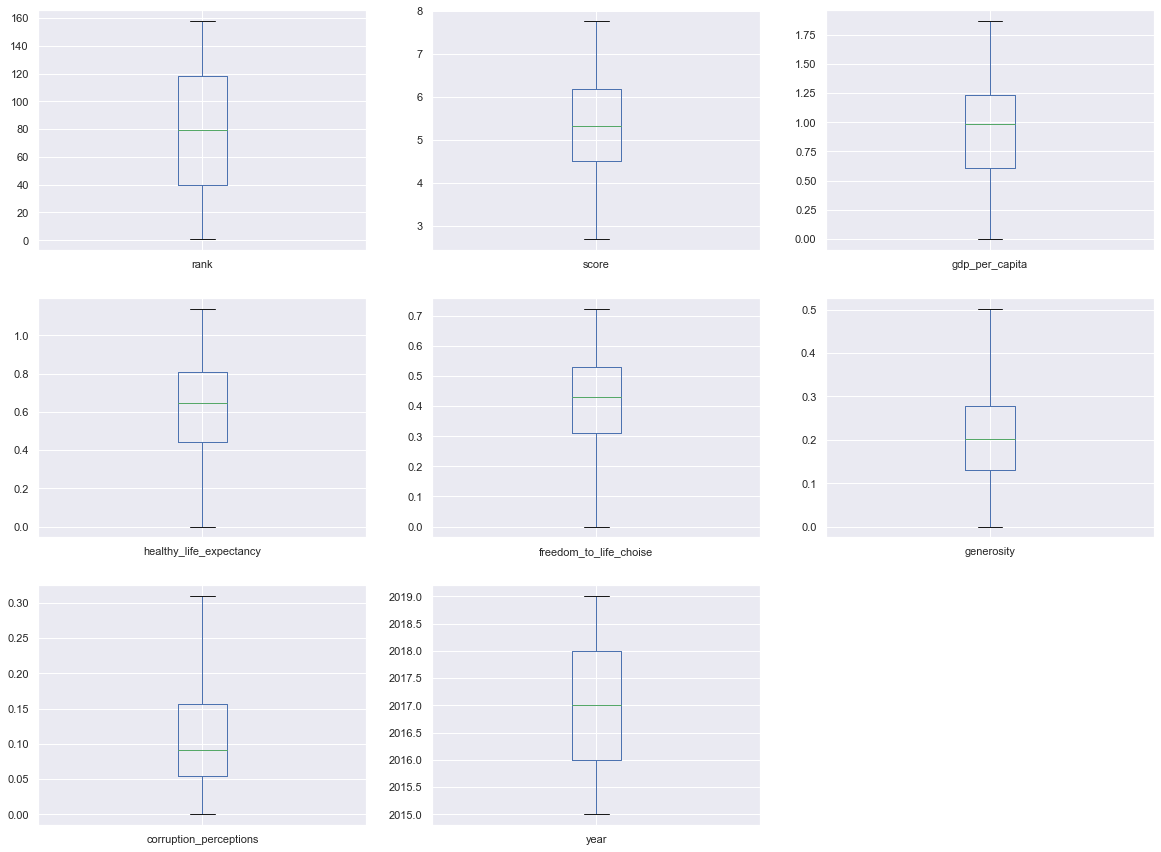

In [16]:
df.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,3))
plt.show()

## 1.3 Veri Normalleştirme (Data Normalization)

In [17]:
df_norm = df.copy()
for col in ['score', 'gdp_per_capita', 'healthy_life_expectancy', 
            'freedom_to_life_choise', 'generosity', 'corruption_perceptions', 'year']:
        
        df_norm[col] = (df_norm[col]-df_norm[col].min())/(df_norm[col].max()-df_norm[col].min())*100

* Makine öğrenimi modellerinin daha iyi çalıştırılması için "Data Normalization" işlemi gerçekleştirildi.

## 2. Keşifsel Veri Analizi (EDA)

## 2.1 Sayısal Değişkenler (Numerical Features)

In [18]:
df.head()

rank       region  score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions  year
0     1  Switzerland  7.587         1.39651                  0.94143                 0.66557     0.29678                0.309075  2015
1     2      Iceland  7.561         1.30232                  0.94784                 0.62877     0.43630                0.141450  2015
2     3      Denmark  7.527         1.32548                  0.87464                 0.64938     0.34139                0.309075  2015
3     4       Norway  7.522         1.45900                  0.88521                 0.66973     0.34699                0.309075  2015
4     5       Canada  7.427         1.32629                  0.90563                 0.63297     0.45811                0.309075  2015

In [19]:
df.columns

Index(['rank', 'region', 'score', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_life_choise', 'generosity', 'corruption_perceptions', 'year'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     781 non-null    int64  
 1   region                   781 non-null    object 
 2   score                    781 non-null    float64
 3   gdp_per_capita           781 non-null    float64
 4   healthy_life_expectancy  781 non-null    float64
 5   freedom_to_life_choise   781 non-null    float64
 6   generosity               781 non-null    float64
 7   corruption_perceptions   781 non-null    float64
 8   year                     781 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 61.0+ KB


### Histogram

In [21]:
numericVar = ['gdp_per_capita', 'healthy_life_expectancy', 
             'freedom_to_life_choise','generosity', 'corruption_perceptions']

In [22]:
def hist_plot(variable):
    plt.figure(figsize = (9,3))
    
    plt.hist(df[variable], bins = 50)
    
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

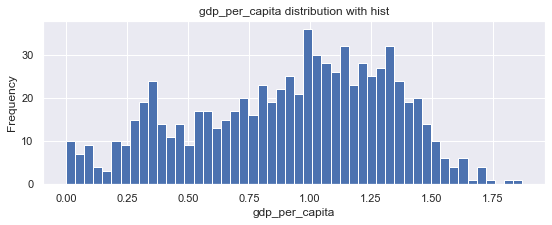

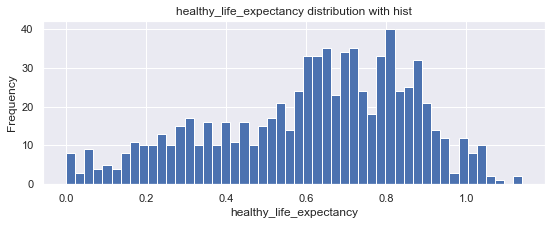

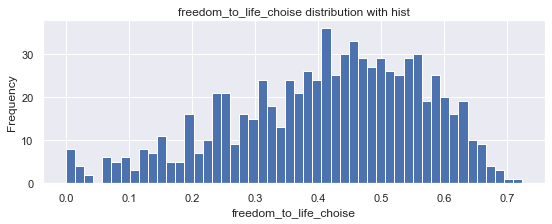

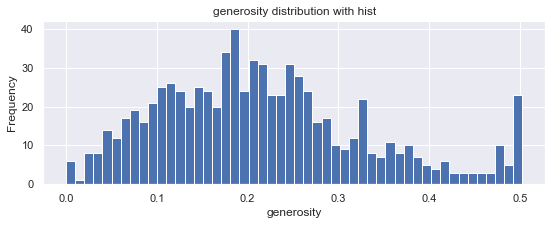

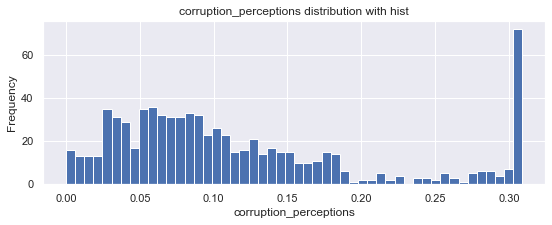

In [23]:
for n in numericVar:
    hist_plot(n)

# 2.2 Kategorik Değişkenler (Categorical Features)

* Kategorik değişkenimiz 170 tane ülke olduğu için burada keşif yapılmadı.

## 2.3 İlişkiler

In [24]:
df.corr()

rank     score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions      year
rank                     1.000000 -0.992053       -0.795110                -0.744099               -0.540151   -0.132809               -0.380062 -0.006594
score                   -0.992053  1.000000        0.789719                 0.742843                0.553365    0.153176                0.405096  0.005946
gdp_per_capita          -0.795110  0.789719        1.000000                 0.787752                0.345615   -0.001055                0.301720  0.017230
healthy_life_expectancy -0.744099  0.742843        0.787752                 1.000000                0.341155    0.019095                0.242350  0.130138
freedom_to_life_choise  -0.540151  0.553365        0.345615                 0.341155                1.000000    0.299000                0.458188  0.011118
generosity              -0.132809  0.153176       -0.001055                 0.019095                0.299000    1.000000                0.339078 -0.195484
corruption_perceptions  -0.380062  0.405096        0.301720                 0.242350                0.458188    0.339078                1.000000 -0.116291
year                    -0.006594  0.005946        0.017230                 0.130138                0.011118   -0.195484               -0.116291  1.000000

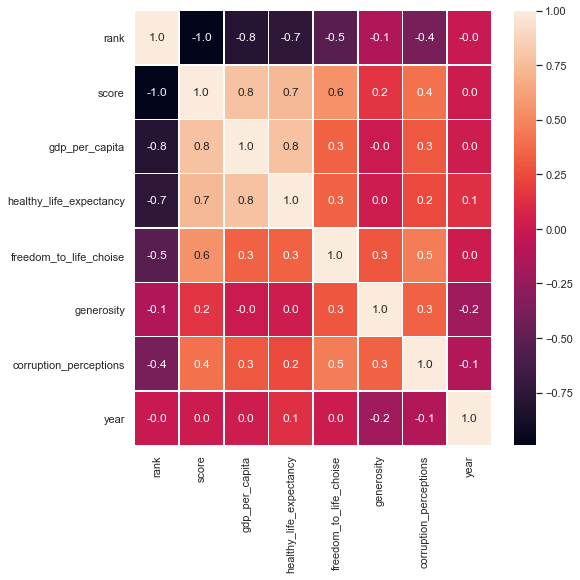

In [25]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

* En güçlü korelasyona sahip veri gdp_per_capita
* freedom_to_life_choise, corruption_perceptions ve healty_life_expectancy ortalama koresyona sahip
* generosity  ise en düşük korelasyona sahip veri

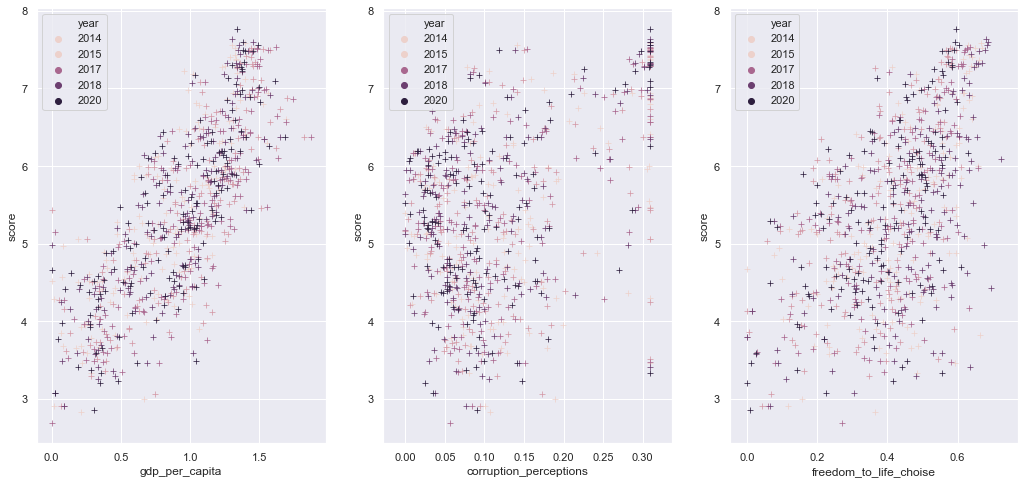

In [26]:
x = ["gdp_per_capita", 
     "corruption_perceptions",
     "freedom_to_life_choise",] #yüksek korelasyona sahip değişkenler


plt.figure(figsize=(30,8))

i = 151

for j in x:
    plt.subplot(i)
    sns.set_palette("bright")
    plot = sns.scatterplot(x=j, y='score', data=df, marker='+', hue="year")
    i+=1

* önem derecesi:

- gdp_per_capita > healthy_life_expectancy > freedom_to_life_choise > corruption_perceptions > generosity

## 3. Veri Görselleştirme (Data Visualization)

In [27]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px

### healthy_life_expectancy, gdp_per_capita, and freedom_to_life_choise

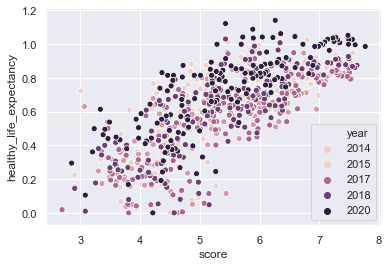

In [28]:
sns.scatterplot(x = "score", y = "healthy_life_expectancy", hue = "year",data = df);

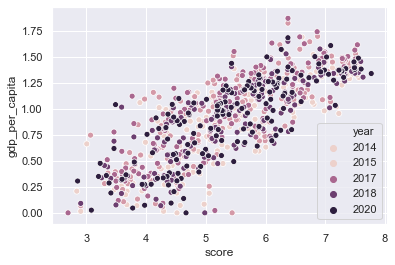

In [29]:
sns.scatterplot(x = "score", y = "gdp_per_capita", hue = "year",data = df);

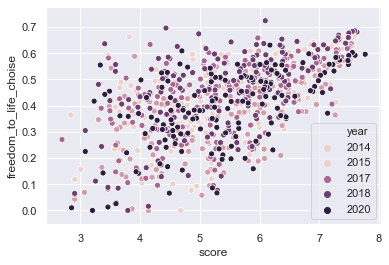

In [30]:
sns.scatterplot(x = "score", y = "freedom_to_life_choise", hue = "year",data = df);

### En mutlu ve en mutsuz 10 ülke

In [31]:
#en mutsuz ülkeler
display(df[['region','score']].sort_values(by="score", ascending=True).set_index("score").head(10))

region
score                          
2.693  Central African Republic
2.839                      Togo
2.853               South Sudan
2.905                   Burundi
2.905                   Burundi
2.905                   Burundi
2.905                   Burundi
3.006                     Syria
3.069                     Syria
3.083  Central African Republic

In [32]:
#en mutlu ülkeler
display(df[['region','score']].sort_values(by="score", ascending=True).set_index("score").tail(10))

region
score             
7.527      Denmark
7.537       Norway
7.554       Norway
7.555      Denmark
7.561      Iceland
7.587  Switzerland
7.594       Norway
7.600      Denmark
7.632      Finland
7.769      Finland

In [33]:
px.scatter(df, x="healthy_life_expectancy", y="score", animation_frame="year",
           animation_group="region",
           size="rank", color="region", hover_name="region",
          trendline= "ols",
          hover_data=[df.score])

In [34]:
px.scatter(df, x="gdp_per_capita", y="score", animation_frame="year",
           animation_group="region",
           size="rank", color="region", hover_name="region",
          trendline= "ols",
          hover_data=[df.score])

In [35]:
px.scatter(df, x="freedom_to_life_choise", y="score", animation_frame="year",
           animation_group="region",
           size="rank", color="region", hover_name="region",
          trendline= "ols",
          hover_data=[df.score])

# 4. Machine Learning

In [36]:
df.head()

rank       region  score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions  year
0     1  Switzerland  7.587         1.39651                  0.94143                 0.66557     0.29678                0.309075  2015
1     2      Iceland  7.561         1.30232                  0.94784                 0.62877     0.43630                0.141450  2015
2     3      Denmark  7.527         1.32548                  0.87464                 0.64938     0.34139                0.309075  2015
3     4       Norway  7.522         1.45900                  0.88521                 0.66973     0.34699                0.309075  2015
4     5       Canada  7.427         1.32629                  0.90563                 0.63297     0.45811                0.309075  2015

In [37]:
df = df.drop("rank", axis=1)
df = df.drop("region", axis=1)
df = df.drop ("year", axis=1)

* Modelde kullanılmayacak değişkenler veri setinden çıkartıldı.

In [38]:
df.head()

score  gdp_per_capita  healthy_life_expectancy  freedom_to_life_choise  generosity  corruption_perceptions
0  7.587         1.39651                  0.94143                 0.66557     0.29678                0.309075
1  7.561         1.30232                  0.94784                 0.62877     0.43630                0.141450
2  7.527         1.32548                  0.87464                 0.64938     0.34139                0.309075
3  7.522         1.45900                  0.88521                 0.66973     0.34699                0.309075
4  7.427         1.32629                  0.90563                 0.63297     0.45811                0.309075

In [39]:
y = df["score"]
X = df.drop(['score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [40]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (585, 5)
X_test shape:  (196, 5)
y_train shape:  (585,)
y_test shape:  (196,)


## Linear Regression

In [41]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


#training
mlregr=linear_model.LinearRegression()
mlregr.fit(X_train,y_train)


LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#predicting
y_pred= mlregr.predict(X_test)

#for i in range(len(y_test)):
    #print ("Actual:" ,y_test[i] ," Predicted with linear regression:" ,y_pred[i])
    
print("Coefficients: ", mlregr.coef_)
print("Intercepts:  " , mlregr.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients:  [1.25386472 1.27488858 2.01821672 0.49908875 0.72816173]
Intercepts:   2.445530570802126
Mean squared error: 0.34
Variance score: 0.72


## Conclusion

#### Algoritma olarak doğrusal regresyonu ve öngörücü olarak mutluluk geçmişini kullanarak mutluluğu tahmin etmek, bize düşük önyargı (iyi doğruluk) ve düşük varyans (genelleme) ile tahminler verdi.